In [89]:

%matplotlib inline

from matplotlib import pyplot as plt

import torch
from torch import nn
from torch import tensor
from livelossplot import PlotLosses
import pandas as pd

,Unnamed: 0,Frames,Angles
0,0,0.0,318.190134
1,1,1.0,307.778631
2,2,2.0,300.946297
3,3,3.0,283.372521
4,4,4.0,268.087842


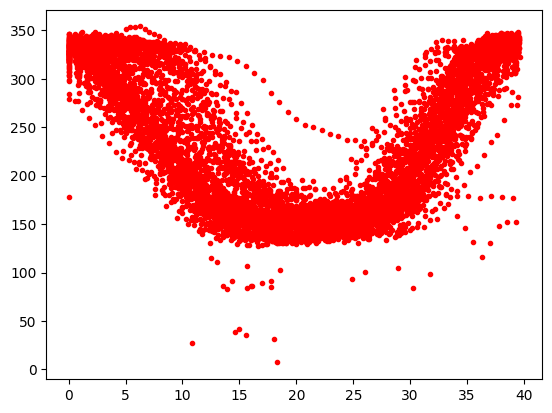

In [90]:

# X = torch.linspace(-2., 2., 30).unsqueeze(1)
# Y = torch.cat([torch.zeros(10),  torch.linspace(0., 1., 10), 1. + torch.zeros(10)], dim=0)
# plt.plot(X.squeeze().numpy(), Y.numpy(), 'r.')

df = pd.read_csv("./courses.csv")
df.head()
# X = landmarks_frame.iloc[1, 2]
# print(X)
# Y = landmarks_frame.iloc[2:]
# # Y = Y.astype('float').reshape(-1, 2)

# train, val = train_test_split("full.csv", test_size=0.2)

X=df['Frames']
Y=df['Angles']

plt.plot(df['Frames'], df['Angles'], 'r.')
df.head()



In [91]:

def train(X, Y, model, loss_function, optim, num_epochs):
    loss_history = []
    
    

    

    for epoch in range(num_epochs):
        
        epoch_loss = 0.0
        
        Y_pred = model(X)
        loss = loss_function(Y_pred, Y)
        
        loss.backward()
        optim.step()
        optim.zero_grad()
        
    # plt.plot(X.squeeze(1).numpy(), Y.numpy(), 'r.', label="Ground truth")
    # plt.plot(X.squeeze(1).numpy(), model(X).detach().numpy(), '-', label="Model")
    # plt.title("Prediction")
    # plt.legend(loc='lower right') 


In [92]:
class NonLinearModel(torch.nn.Module):
    
    def __init__(self, input_size, num_classes):
        
        super().__init__()
        
        # Neural Network Architecture
        self.dense1 = torch.nn.Linear(in_features=1, out_features=400)
        self.activation1 = torch.nn.LogSigmoid()
        self.dense2 = torch.nn.Linear(in_features=400, out_features=1)
        self.activation2 = torch.nn.LogSigmoid()
        
    def forward(self, X):
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.activation2(X)
        return X

In [93]:

nonlinear_model = NonLinearModel(1, 1)

optim = torch.optim.SGD(nonlinear_model.parameters(), lr=0.2)
# optim = torch.optim.Adam(nonlinear_model.parameters(), lr=0.1)
loss_function = nn.MSELoss()

AttributeError: 'NonLinearModel' object has no attribute 'nonrandom_init'

In [ ]:
train(X, Y, nonlinear_model, loss_function, optim, num_epochs=200)


TypeError: 'int' object is not callable